In [2]:
#first step EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
#pd.option.mode.chained_assignment=None


In [4]:
train_df=pd.read_json("E:/data/kaggle/train.json")
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [5]:
test_df=pd.read_json("E:/data/kaggle/test.json")
print ("Train Rows:",train_df.shape[0])
print ("Train Rows:",test_df.shape[0])

('Train Rows:', 49352)
('Train Rows:', 74659)


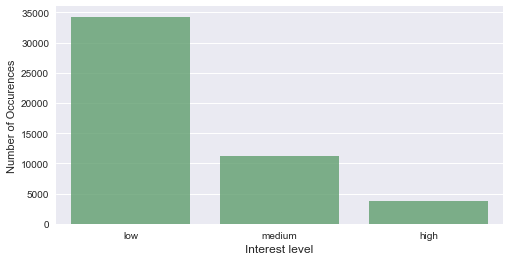

In [6]:
int_level=train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index,int_level.values,alpha=0.8,color=color[1])
plt.ylabel('Number of Occurences')
plt.xlabel('Interest level',fontsize=12)
plt.show()

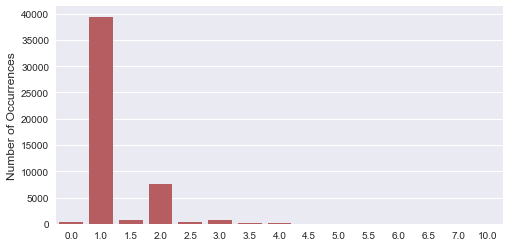

In [7]:
cnt_srs=train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=1,color=color[2])
plt.ylabel('Number of Occurrences',fontsize=12)
plt.show()

E:\software\Python\python\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


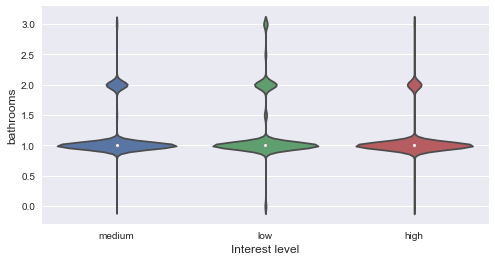

In [8]:
train_df['bathrooms'].loc[train_df['bathrooms']>3]=3
plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level',y='bathrooms',data=train_df)
plt.xlabel('Interest level',fontsize=12)
plt.ylabel('bathrooms',fontsize=12)
plt.show()

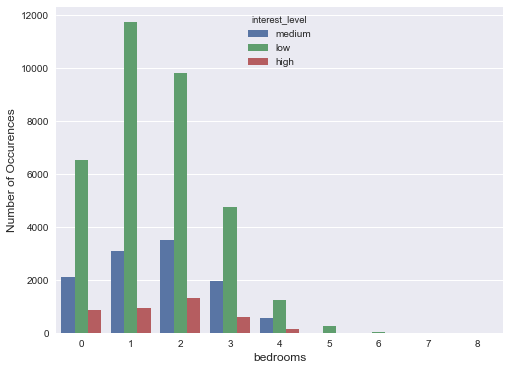

In [9]:
#bedroom
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms',hue='interest_level',data=train_df)
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('bedrooms',fontsize=12)
plt.show()

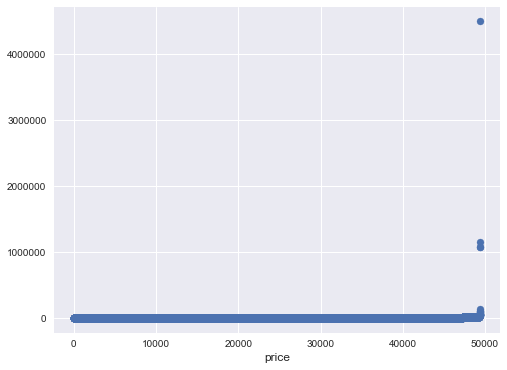

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]),np.sort(train_df.price.values))
plt.xlabel('index',fontsize=12)
plt.xlabel('price',fontsize=12)
plt.show()

In [11]:
train_df[train_df["price"]<1000]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
102756,1.0,0,abdc40a80dc42f32e02d10d3e629253e,2016-04-12 03:48:49,,Marshall Street,[],medium,40.7291,6859573,-74.2224,782b04129d661ae064fe013aeb297ace,[https://photos.renthop.com/2/6859573_6ca2527f...,695,12 Marshall Street
109164,1.0,1,454f1c552a74e39cd324cde4e357e986,2016-04-27 19:17:48,1bdr in a 3 bdr apartment for short term with ...,2501 ditmars blvd,"[Reduced Fee, Exclusive]",high,40.7788,6934177,-73.9142,453d46f8113e1f2c730c2ee5a4469c71,[https://photos.renthop.com/2/6934177_22156be5...,800,2501 ditmars blvd
113552,1.0,0,abdc40a80dc42f32e02d10d3e629253e,2016-04-13 04:20:52,,Marshall Street,[],medium,40.7291,6865783,-74.2224,782b04129d661ae064fe013aeb297ace,[https://photos.renthop.com/2/6865783_9ec986f5...,695,12 Marshall Street
113599,1.0,0,abdc40a80dc42f32e02d10d3e629253e,2016-04-06 05:24:27,,Marshall Street,[],medium,40.7291,6831246,-74.2224,782b04129d661ae064fe013aeb297ace,[https://photos.renthop.com/2/6831246_ab971bf6...,695,12 Marshall Street
115551,1.0,0,48732a9cedfb34b41d90867ccf4c6a4a,2016-04-06 03:33:13,,Seagirt Blvd,"[Elevator, Fitness Center]",medium,40.5956,6829895,-73.7555,1f744f86c927e6bae893ba6d4041508a,[https://photos.renthop.com/2/6829895_520788ae...,999,20-10 Seagirt Blvd
117339,1.0,1,f49ca2c8ca255a482d7ea03860ae7234,2016-04-14 03:39:47,"Now available, absolutely stunning 1 bedroom 1...",Broadway,"[Elevator, Pre-War, Laundry in Building, Dishw...",low,40.7878,6871682,-73.9763,35fc09b29adc23a8beed56f0aa3aaf37,[https://photos.renthop.com/2/6871682_8c82f956...,401,2350 Broadway
22693,1.0,2,a27d721ce4d987421c85da7b88340d3f,2016-06-08 21:40:15,Unfurnished or furnished room for rent in Quee...,"271 E Fordham Rd,",[Furnished],high,40.8624,7127753,-73.8950,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7127753_5064613d...,700,"271 E Fordham Rd,"
51007,2.0,3,0,2016-05-13 19:38:36,Hello! Soraya at Roomeze is here as your Roomm...,Summerfield and wyckoff,"[Common Outdoor Space, Laundry In Unit, Cats A...",low,40.6947,7008854,-73.9025,2201398c574707735d52e574352acf7d,[],950,Summerfield and Wyckoff
53144,1.0,0,64f8e51f01a36ab0cd55fe9de2381306,2016-05-24 05:24:56,<p><a website_redacted,Madison,"[Doorman, Elevator, High Speed Internet]",low,40.7120,7060255,-73.9971,29ebd2f6553fbe12706a006a97349dd6,[],43,60 Madison
61138,0.0,0,d9e54b36629f27a7ecda5ea55e90628d,2016-05-02 02:49:33,A modern mid-rise elevator building located in...,2340 Beaumont Avenue,"[On-site Parking Lot, Live-in Super, Laundry i...",high,40.8529,6952911,-73.8850,9df32cb8dda19d3222d66e69e258616b,[https://photos.renthop.com/2/6952911_56faa406...,868,2340 Beaumont Avenue


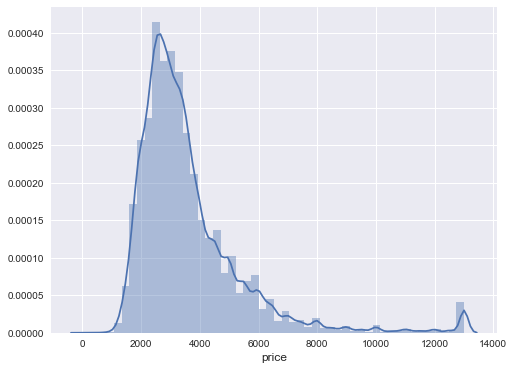

In [12]:
#imputate outliers in price
ulimit=np.percentile(train_df.price.values,99)#13000
train_df['price'].loc[train_df['price']>ulimit]=ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values,bins=50,kde=True)
plt.xlabel('price',fontsize=12)
plt.show()
#right skewed

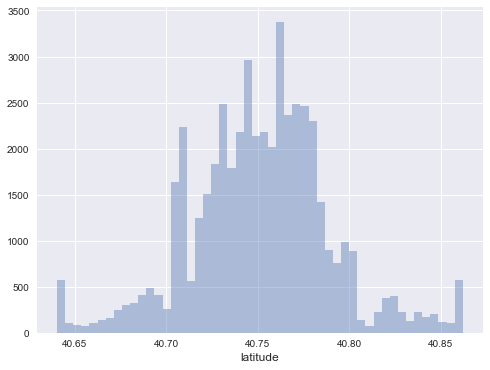

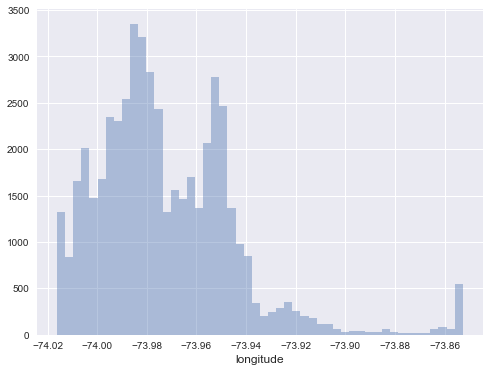

In [13]:
#latittude
llimit = np.percentile(train_df.latitude.values, 1)
ulimit = np.percentile(train_df.latitude.values, 99)
train_df['latitude'].loc[train_df['latitude']<llimit] = llimit
train_df['latitude'].loc[train_df['latitude']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.latitude.values, bins=50, kde=False)
plt.xlabel('latitude', fontsize=12)
plt.show()

#longtitude
llimit = np.percentile(train_df.longitude.values, 1)
ulimit = np.percentile(train_df.longitude.values, 99)
train_df['longitude'].loc[train_df['longitude']<llimit] = llimit
train_df['longitude'].loc[train_df['longitude']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.longitude.values, bins=50, kde=False)
plt.xlabel('longitude', fontsize=12)
plt.show()

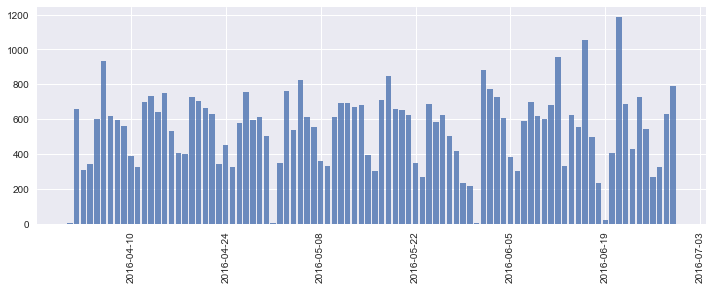

In [14]:
#created column
train_df["created"]=pd.to_datetime(train_df["created"])
train_df["date_created"]=train_df["created"].dt.date
cnt_srs=train_df['date_created'].value_counts()

plt.figure(figsize=(12,4))
ax=plt.subplot(111)
ax.bar(cnt_srs.index,cnt_srs.values,alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()


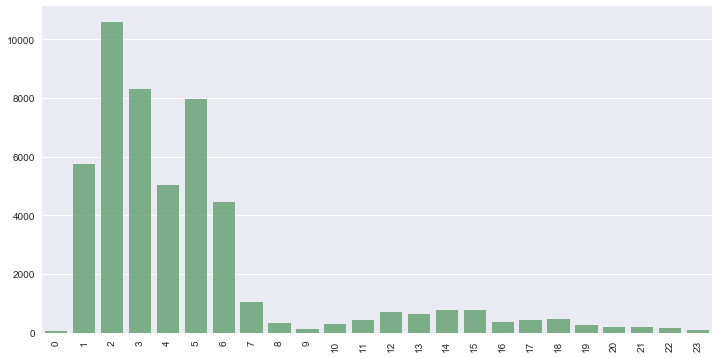

In [15]:
#hour wise listing trend
train_df["hour_created"]=train_df["created"].dt.hour
cnt_srs=train_df['hour_created'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8,color=color[1])
plt.xticks(rotation='vertical')
plt.show()

Display_address that appear less than 2 times:63.22%
Display_address that appear less than 10 times:89.6%
Display_address that appear less than 50 times:97.73%
Display_address that appear less than 100 times:99.26%
Display_address that appear less than 500 times:100.0%


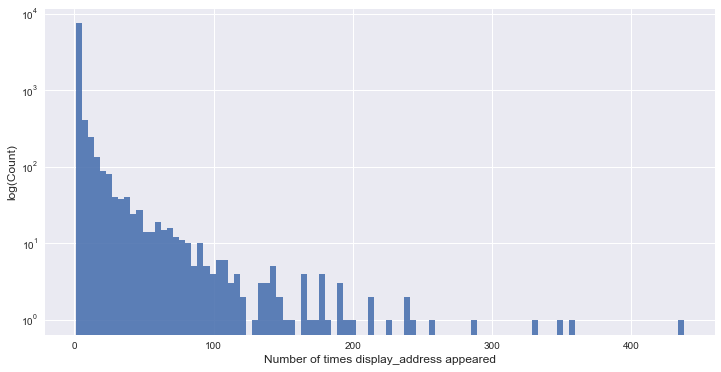

In [16]:
#display address
cnt_srs=train_df.groupby("display_address")["display_address"].count()
for i in [2,10,50,100,500]:
    print('Display_address that appear less than {} times:{}%'.format(i,round((cnt_srs<i).mean()*100,2)))
plt.figure(figsize=(12,6))
plt.hist(cnt_srs.values,bins=100,log=True,alpha=0.9)
plt.xlabel('Number of times display_address appeared', fontsize=12)
plt.ylabel('log(Count)', fontsize=12)
plt.show()

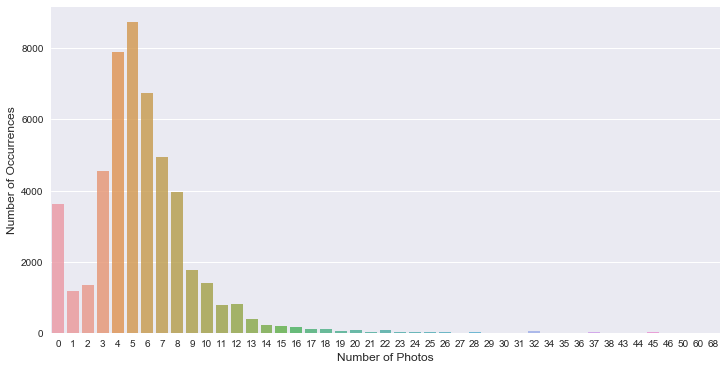

In [17]:
#number of photos
train_df["num_photos"]=train_df["photos"].apply(len)
cnt_srs = train_df['num_photos'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [18]:
 train_df["features"].head()

10                                                       []
10000     [Doorman, Elevator, Fitness Center, Cats Allow...
100004    [Laundry In Building, Dishwasher, Hardwood Flo...
100007                            [Hardwood Floors, No Fee]
100013                                            [Pre-War]
Name: features, dtype: object

In [ ]:
#word cloud
from wordcloud import WordCloud
text = ''
text_da = ''
text_desc = ''
for ind, row in train_df.iterrows():
    for feature in row['features']:
        text = " ".join([text, "_".join(feature.strip().split(" "))])
    text_da = " ".join([text_da,"_".join(row['display_address'].strip().split(" "))])
    #text_desc = " ".join([text_desc, row['description']])
text = text.strip()
text_da = text_da.strip()
text_desc = text_desc.strip()

plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for features", fontsize=30)
plt.axis("off")
plt.show()

# wordcloud for display address
plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text_da)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for Display Address", fontsize=30)
plt.axis("off")
plt.show()